Class distribution before random oversampling:
0    227451
1       394
Name: Class, dtype: int64

Class distribution after random oversampling:
0    227451
1    227451
Name: Class, dtype: int64


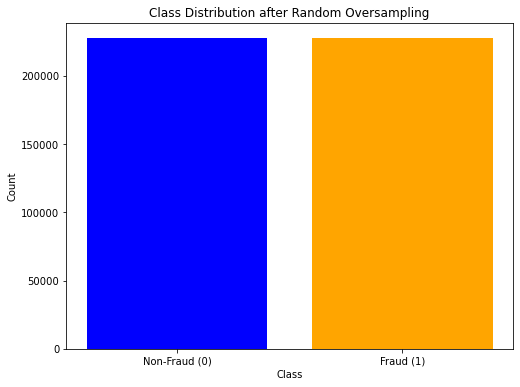

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt


# 加载数据
data = pd.read_csv("../Data/creditcard.csv")

# 划分数据集
X = data.drop("Class", axis=1)  # 特征
y = data["Class"]  # 目标变量

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 进行随机过采样
ros = TomekLinks(sampling_strategy='majority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 输出每个类别的样本数
print("Class distribution before TomekLinks:")
print(y_train.value_counts())

print("\nClass distribution after TomekLinks:")
print(pd.Series(y_resampled).value_counts())

# 可视化类别分布
plt.figure(figsize=(8, 6))
plt.bar(pd.Series(y_resampled).value_counts().index, pd.Series(y_resampled).value_counts().values, color=['blue', 'orange'])
plt.title('Class Distribution after TomekLinks')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


# 选择支持向量机分类器
svm_classifier = SVC(kernel='linear', random_state=42)  # 选择线性核，你也可以尝试其他核函数

# 训练分类器
svm_classifier.fit(X_resampled, y_resampled)

# 预测概率
y_proba_svm = svm_classifier.decision_function(X_test)

# 计算AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
auprc = auc(recall, precision)

# 打印AUPRC
print("AUPRC(SVM with RandomOverSampling):", auprc)

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC(SVM with RandomOverSampling) = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(SVM with RandomOverSampling)')
plt.legend()
plt.show()
